<a href="https://colab.research.google.com/github/ketanmewara/Safe-Drive-Prediction/blob/main/Safe_Driver_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Safe Driver Prediction

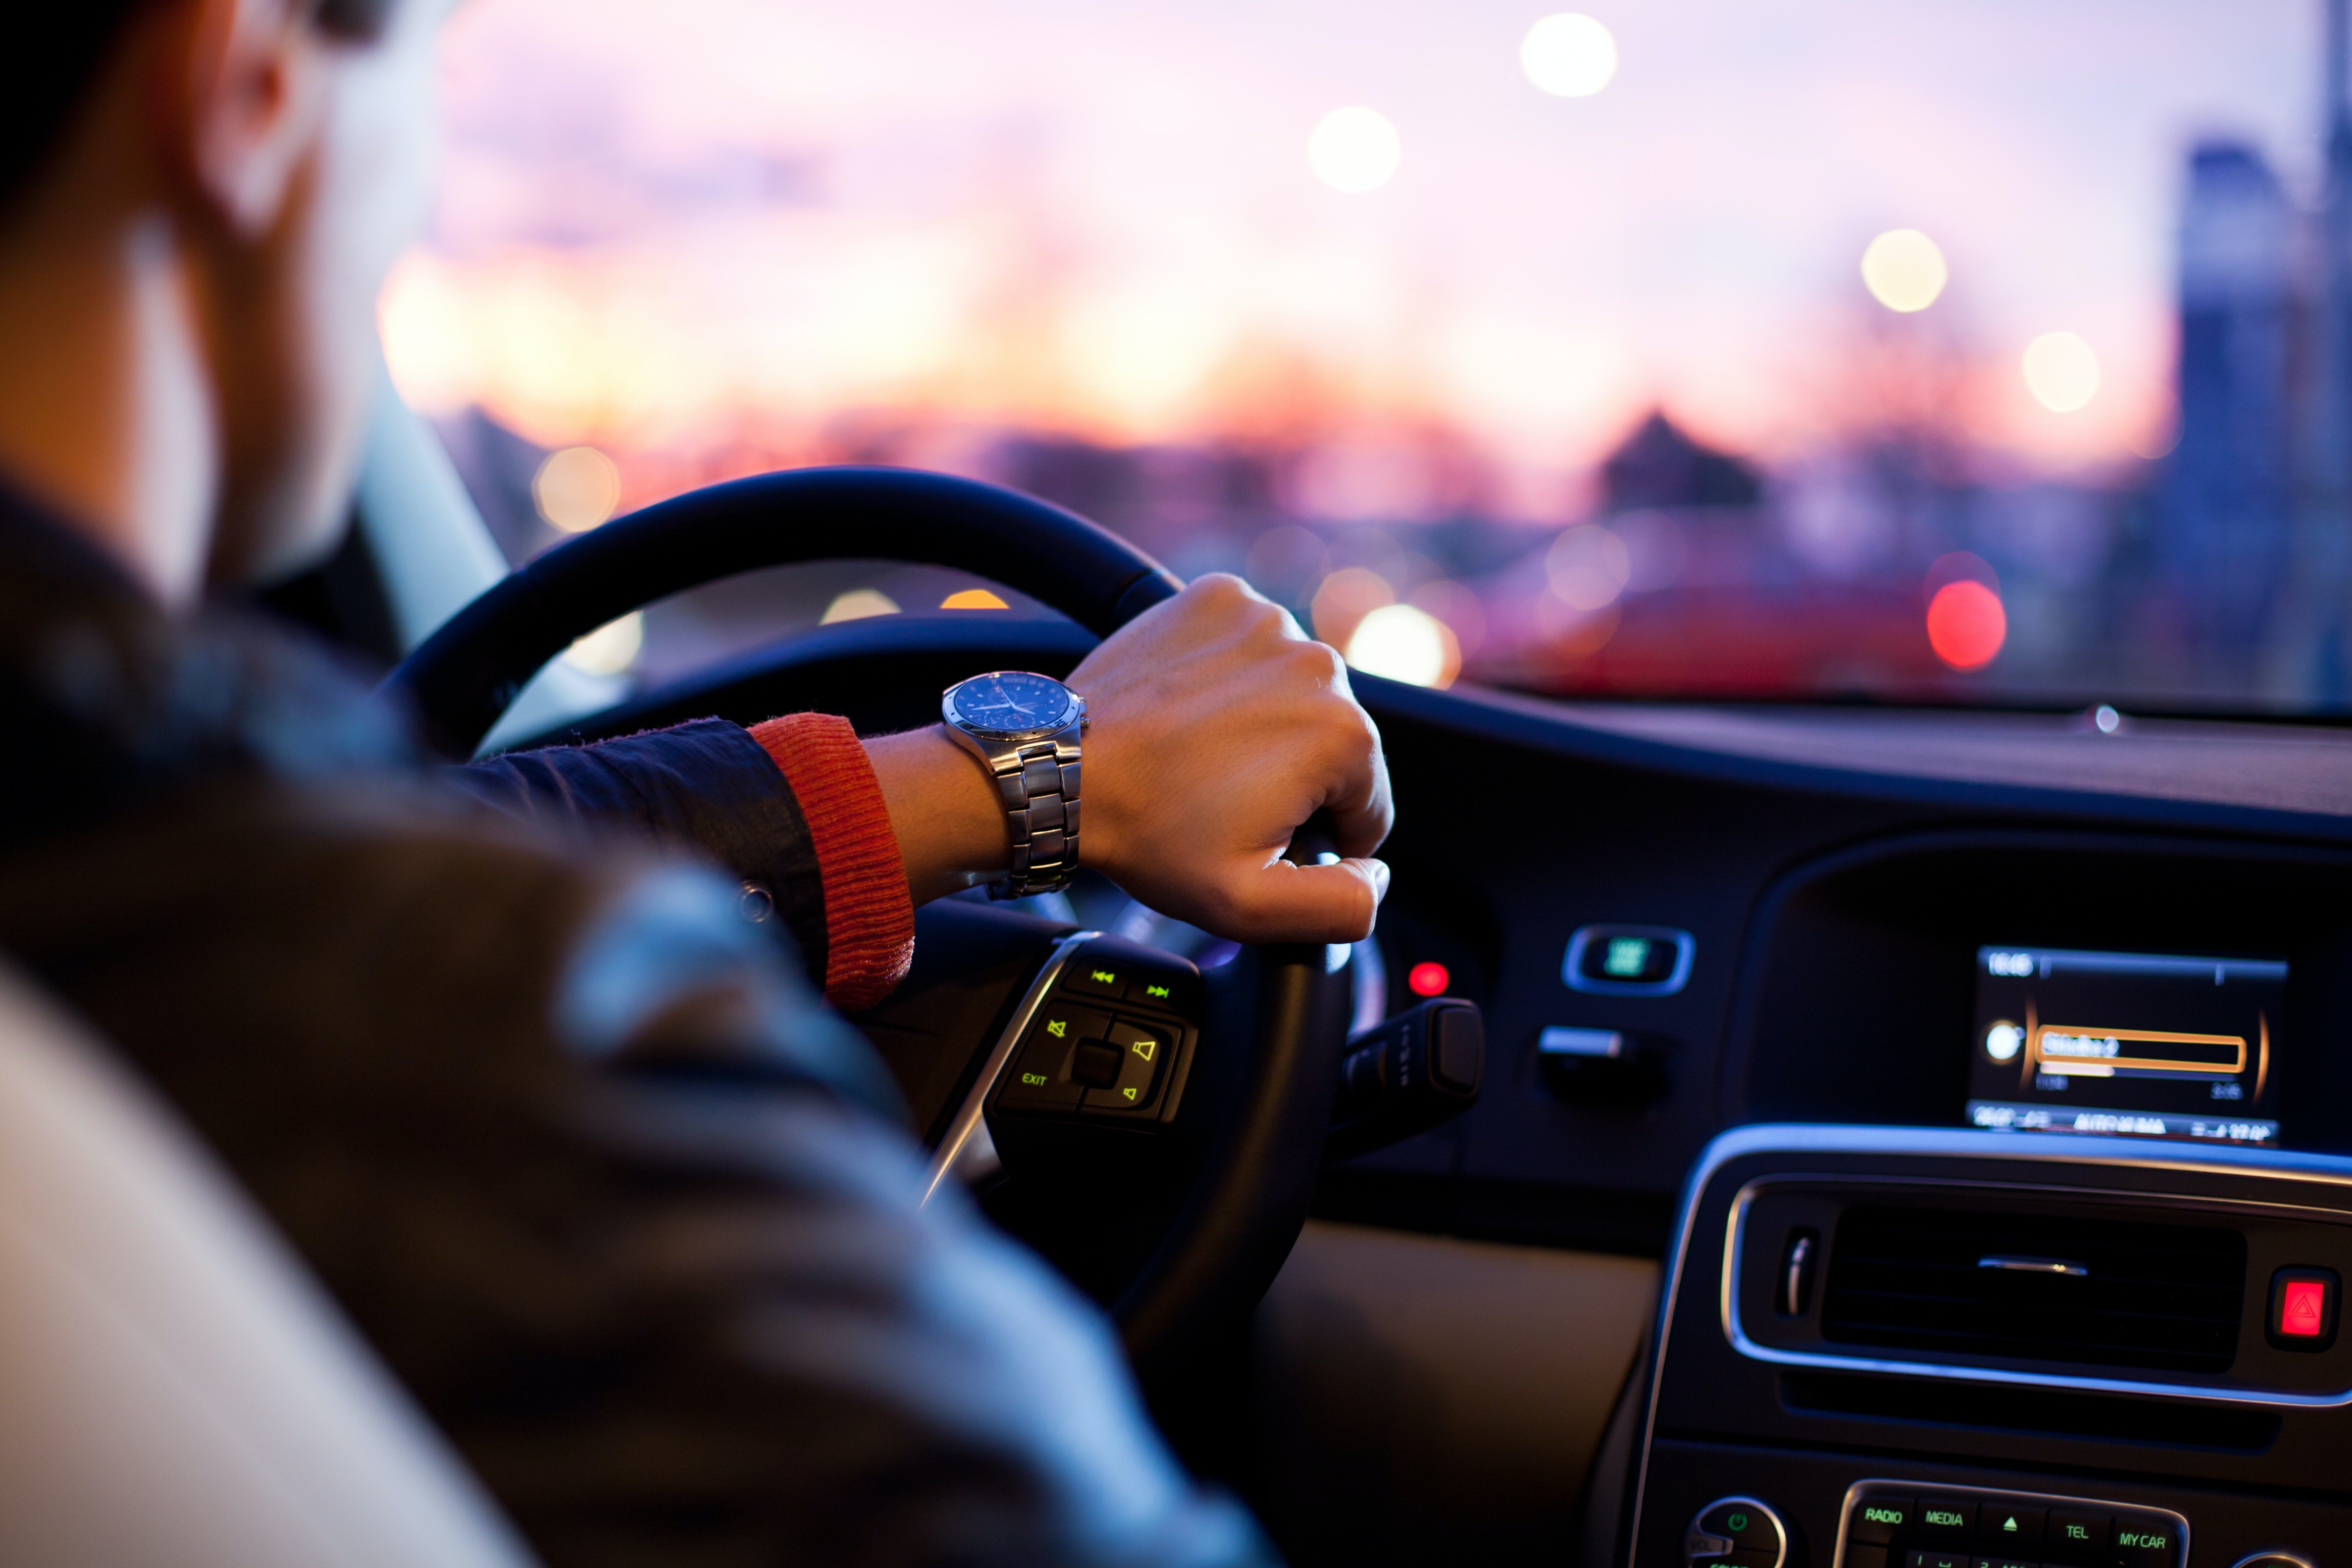

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

## Download real-world data from Kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
# Download data from Kaggle
od.download('https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data')

## Dataset Description

In this project, we will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
train_df = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv')
test_df = pd.read_csv('porto-seguro-safe-driver-prediction/test.csv')

In [ ]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
train_df.shape

(595212, 59)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

We can see there is no null values in dataset

## Exploratory Data Analysis

In [ ]:
train_df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
idx = train_df['target'].value_counts().index
val = train_df['target'].value_counts().values

px.bar(x=idx,y=val, width=600, height=400)

We can see here data is imbalance...so we will handle it.

## Feature Engineering

### Handle the imbalance dataset

## Helper Function

In [ ]:
def predict_and_plot(inputs, targets, model,name='',normalize=None):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    if normalize == None:
      cf = confusion_matrix(targets, preds,normalize='all')
      plt.figure()
      sns.heatmap(cf, annot=True)
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name));
    else:
      cf = confusion_matrix(targets, preds,normalize=normalize)
      plt.figure()
      sns.heatmap(cf, annot=True)
      plt.xlabel('Prediction')
      plt.ylabel('Target')
      plt.title('{} Confusion Matrix'.format(name));
    
    return preds


def make_auc(model,inputs,target):
    """
  Parameters: 
  -----------
  model : the target model
  inputs: validation inputs or X_test
  target: validation target or y_test

  Return
  -----------
  out: a plot of the Area Under the ROC curve (AUC)
  """

    probs = model.predict_proba(inputs)

    preds = probs[:,1]

    fpr,tpr,threshold = metrics.roc_curve(target,preds)

    roc_auc = metrics.auc(fpr,tpr)

    plt.title( "Receiver Operating Characteristic")
    plt.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    return plt.show()


def plot(param_list, variable_param, **params):
    accuracies = []
    for element in param_list:
      params[variable_param] = element
      model = XGBClassifier(n_jobs=4, random_state=42,**params)
      predictions = model.fit(train_inputs,train_target).predict(val_inputs)
      accuracies.append(accuracy_score(val_target,predictions))
    
    tem_df=pd.DataFrame(list(zip(param_list, accuracies)),columns=[variable_param,"accuracy"])
    fig = px.line(data_frame=tem_df,x=variable_param,y='accuracy', title="XGBoost Learning Curve")
    fig.show()


def make_curve(param_list,eta_rate=None,max_depth=None,n_estimators=None):
  """
  Model: XGBoostClassifier()
  """
  
  if eta_rate == None:
      plot(param_list, "learning_rate")
  elif max_depth == None:
      plot(param_list, "max_depth", learning_rate=eta_rate)
  elif n_estimators == None: 
      plot(param_list, "n_estimators", learning_rate=eta_rate, max_depth = max_depth)

## Model Building

In this section, the models we will go through are as follows:

1. Logistic Regression Model
2. Decision Tree Model
3. Random Forest Model
4. XGBoosting Model

In [ ]:
# train_test_Split function
from sklearn.model_selection import train_test_split

# Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [ ]:
target_col = 'target'
input_cols = train_df.columns[2:]

In [ ]:
df_train, df_validation = train_test_split(train_df,test_size=0.33,random_state=42)

In [ ]:
df_train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
80326,200988,0,0,2,3,1,0,0,0,0,...,2,2,2,9,0,1,1,0,0,0
234939,586885,0,0,2,1,0,0,1,0,0,...,4,0,6,9,0,1,0,0,0,0
447914,1119400,0,4,2,2,1,0,1,0,0,...,8,3,5,7,0,1,1,0,0,1
108058,270504,0,6,2,1,1,0,0,0,1,...,8,3,2,13,0,1,0,0,1,0
89435,223849,0,0,1,3,1,0,0,1,0,...,6,1,2,3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,276032,0,0,3,5,1,0,0,1,0,...,2,4,3,5,0,0,1,0,0,0
259178,647615,0,4,1,4,1,0,0,1,0,...,13,2,3,7,0,1,1,0,1,0
365838,914227,0,2,1,7,0,0,0,0,1,...,4,1,5,8,1,0,1,1,0,0
131932,329659,0,7,4,11,1,0,0,1,0,...,7,1,3,6,1,1,1,0,0,0


In [ ]:
train_inputs = df_train[input_cols].copy()
train_target = df_train[target_col].copy()

val_inputs = df_validation[input_cols].copy()
val_target = df_validation[target_col].copy()

### Logistic Regression Model

In [ ]:
log_model = LogisticRegression(solver='liblinear')

# training the model
log_model.fit(train_inputs,train_target)

LogisticRegression(solver='liblinear')

#### Evaluating Results

a Confusion Matrix
Before diving into the confusion matrix, we should master the concepts below. These concepts are terms we use to describe the results of classification models.

1. True Positive (TP)
- An observation of who actually file an insurance claim (positive) and classified as 1 (Yes). It's called true positive

2. True Negative (TN)
- An observation of who actually did not file an insurance claim (negative) and classified as 0 (No). It's called the true negative

3. False Positive (FP)
- An observation of who actually did not file an insurance claim (negative) and classified as 1 (Yes). It's called false positive

4. False Negative (FN)
- An observation of who actually file an insurance claim ( positive) and classified as 0 (No). It's called false negative

Accuracy: 96.37%


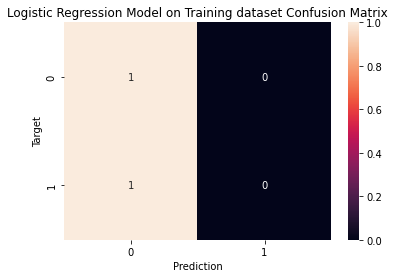

In [ ]:
training_preds = predict_and_plot(train_inputs, train_target, log_model,'Logistic Regression Model on Training dataset',normalize='true')

In [ ]:
confusion_matrix(train_target,training_preds)

array([[384300,      0],
       [ 14492,      0]])

Accuracy: 96.33%


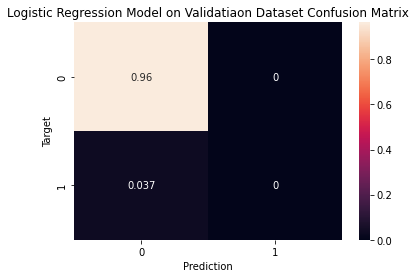

In [ ]:
val_preds = predict_and_plot(val_inputs, val_target, log_model,'Logistic Regression Model on Validatiaon Dataset',normalize='all')

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.criterion='gini'

In [ ]:
tree.fit(train_inputs,train_target)

tree_train_preds= tree.predict(train_inputs)

train_probs = tree.predict_proba(train_inputs)

# Use .predict() method to make predictions with train dataset
tree_train_preds = tree.predict(train_inputs)

In [ ]:
tree.tree_.max_depth

45

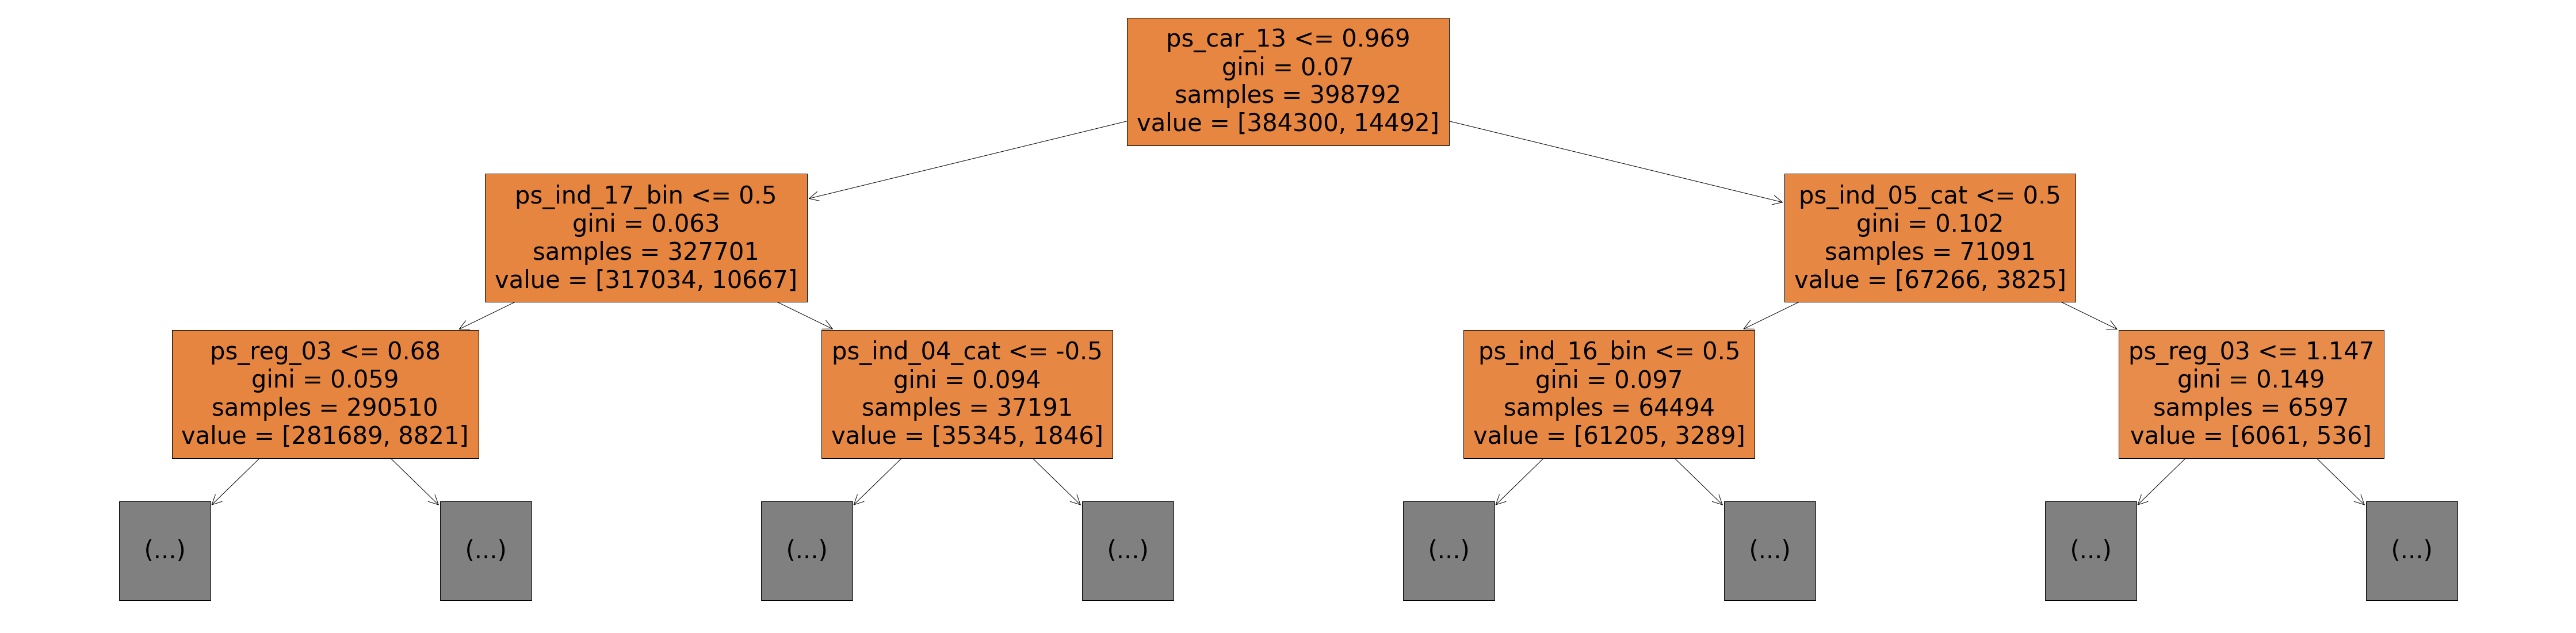

In [ ]:
# Visualize Tree Structure
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree, export_text
%matplotlib inline


# Plot Trees
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

#### Evaluate Decision Tree Model

In [ ]:
tree.score(val_inputs, val_target)

0.9184044394664495

Accuracy: 91.84%


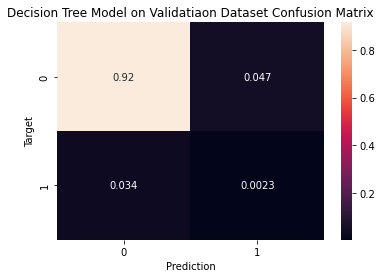

In [ ]:
val_preds = predict_and_plot(val_inputs, val_target, tree,'Decision Tree Model on Validatiaon Dataset')

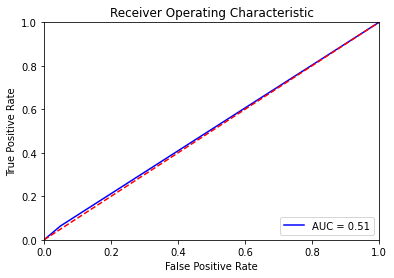

In [ ]:
make_auc(tree,val_inputs,val_target)

#### Features Importances





In [ ]:
# Check feature importance
tree_importances = tree.feature_importances_

tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

tree_importance_df

,feature,importance
34,ps_car_13,0.075808
20,ps_reg_03,0.057813
50,ps_calc_14,0.042354
35,ps_car_14,0.041006
46,ps_calc_10,0.038560
47,ps_calc_11,0.036955
14,ps_ind_15,0.032796
38,ps_calc_02,0.031076
37,ps_calc_01,0.031002
49,ps_calc_13,0.030873


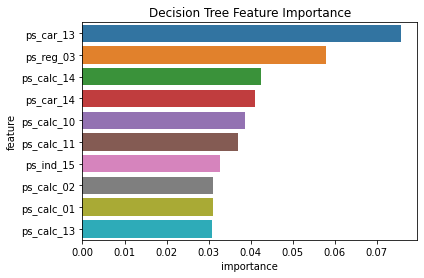

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

### Random Forest

In [ ]:
# Create the model
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%time
# Fit data to model to get parameters
rf_clf.fit(train_inputs,train_target)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


RandomForestClassifier(random_state=42)

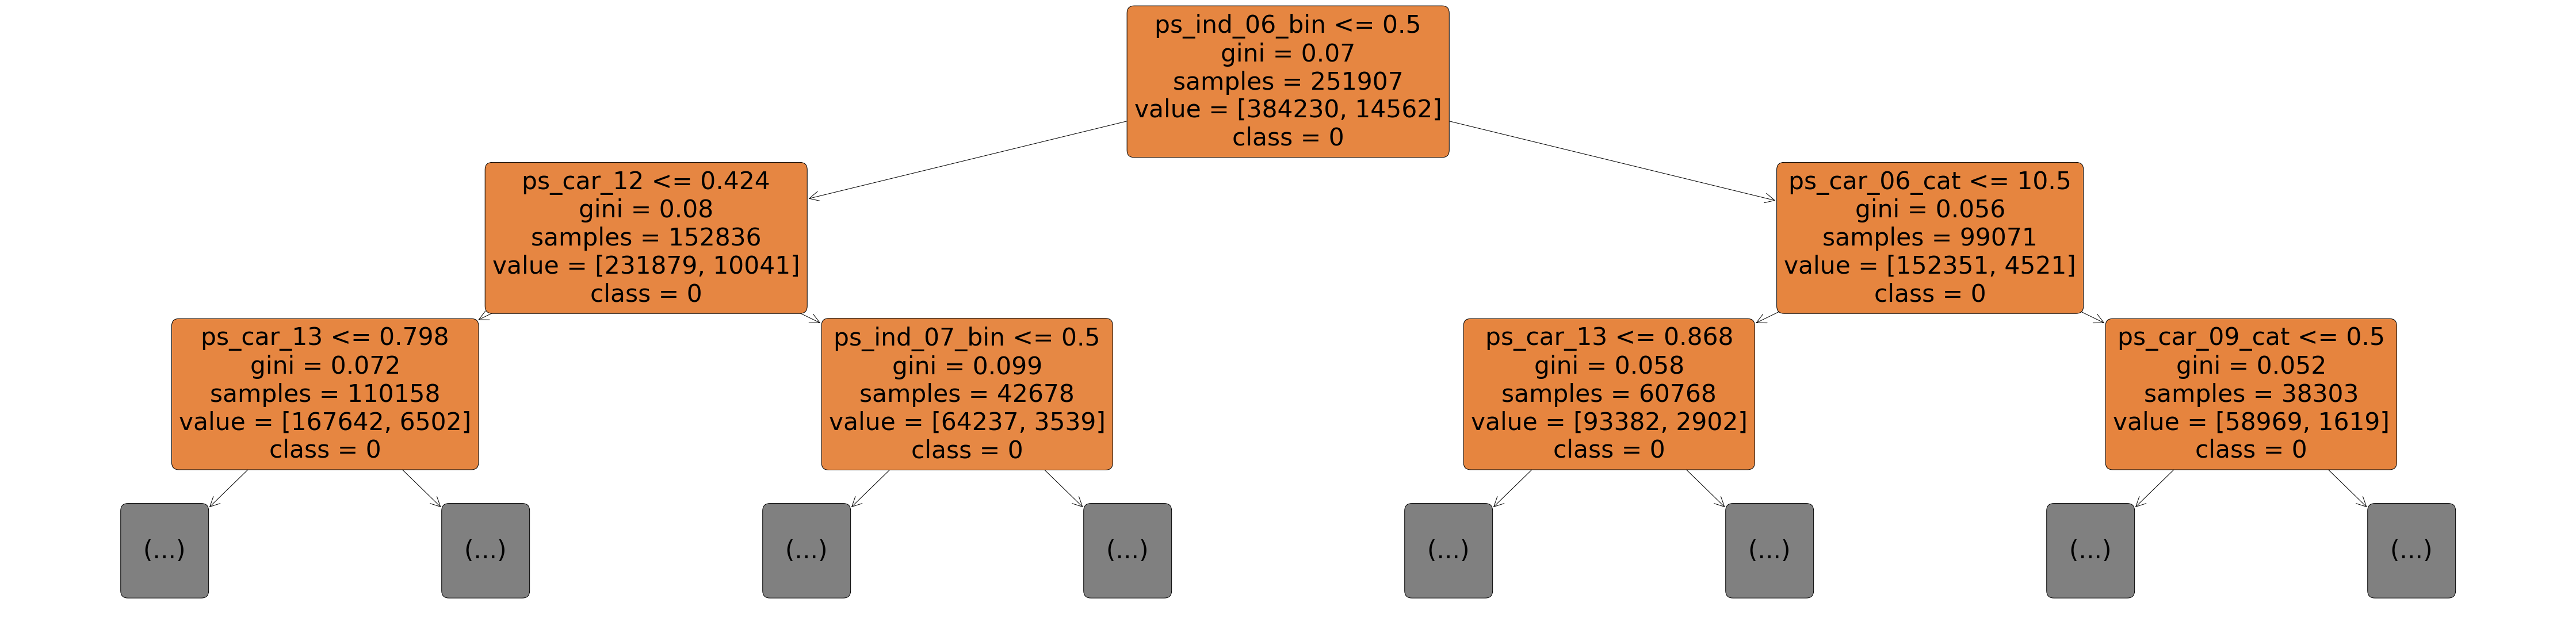

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(rf_clf.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=[str(x) for x in rf_clf.classes_]);

#### Evaluate Random Forest Model

In [ ]:
rf_clf.score(train_inputs,train_target)

0.9999222652410279

In [ ]:
rf_clf.score(val_inputs,val_target)

0.9633336727420833

Accuracy: 96.33%


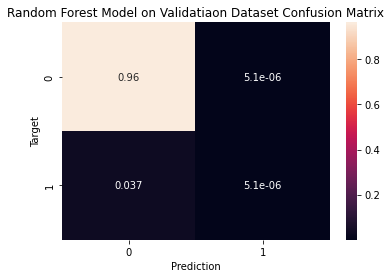

In [ ]:
val_preds = predict_and_plot(val_inputs, val_target, rf_clf,'Random Forest Model on Validatiaon Dataset')

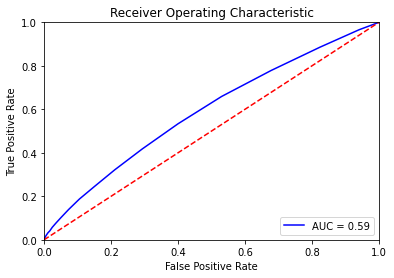

In [ ]:
make_auc(rf_clf,val_inputs,val_target)

###  Gradient Boosting with XGBoost

In [ ]:
xgb_clf = XGBClassifier(n_jobs=4)
xgb_clf.fit(train_inputs,train_target)

XGBClassifier(n_jobs=4)

In [ ]:
train_preds = xgb_clf.predict(train_inputs)

In [ ]:
# evaluate predictions on training dataset
accuracy = accuracy_score(train_target, train_preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.37%


#### Evaluate XGBoost Model

Accuracy: 96.33%


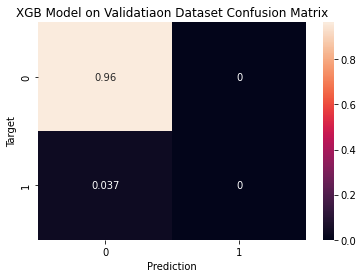

In [ ]:
val_preds = predict_and_plot(val_inputs, val_target, xgb_clf,'XGB Model on Validatiaon Dataset',normalize='pred')

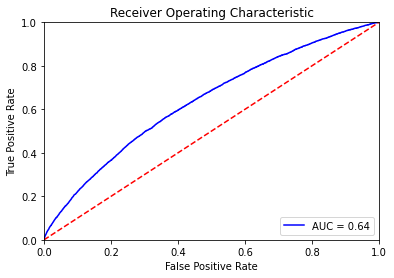

In [ ]:
make_auc(xgb_clf,val_inputs,val_target)

### Hyperparameter Tuning

In [ ]:
param_grid ={
     'n_estimators':[100,250,500,750,1000,1500],
     'learning_rate':np.linspace(0.1,0.01,5),
     'subsample':np.linspace(0.8,1,num=5),
     'colsample_bytree':np.linspace(0.8,1,num=5),
     'gamma':[0,1,5]
 }

In [ ]:
%%time

grid_xgb_clf = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=0,
    refit=True,
    return_train_score= True
    )

CPU times: user 73 µs, sys: 2 µs, total: 75 µs
Wall time: 82 µs


In [ ]:
#Fit the object to our data
grid_xgb_clf.fit(train_inputs,train_target)

# Make predictions
grid_xgb_clf.predict(val_inputs)

### Save the model

In [ ]:
import joblib

joblib.dump(xgb_clf , '/content/drive/MyDrive/Colab Notebooks/Safe Driver Prediction/xgb_clf_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Safe Driver Prediction/xgb_clf_model.pkl']

## Load the model

In [ ]:
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Safe Driver Prediction/xgb_clf_model.pkl')

In [ ]:
submission = pd.read_csv('porto-seguro-safe-driver-prediction/sample_submission.csv')
submission.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


## Prediction on Test dataset

In [ ]:
test_input = test_df[input_cols]

In [ ]:
best_preds = model.predict_proba(test_input)

In [ ]:
output_df= pd.DataFrame(best_preds,columns=['negative','positive']).reset_index()

In [ ]:
output_df

,index,negative,positive
0,0,0.976918,0.023082
1,1,0.973185,0.026815
2,2,0.967040,0.032960
3,3,0.982249,0.017751
4,4,0.962707,0.037293
...,...,...,...
892811,892811,0.902368,0.097632
892812,892812,0.960888,0.039112
892813,892813,0.960921,0.039079
892814,892814,0.971276,0.028724


In [ ]:
submitted_df = output_df.copy().rename(columns={'index':'id','positive':'target'})

In [ ]:
submitted_df

,id,negative,target
0,0,0.976918,0.023082
1,1,0.973185,0.026815
2,2,0.967040,0.032960
3,3,0.982249,0.017751
4,4,0.962707,0.037293
...,...,...,...
892811,892811,0.902368,0.097632
892812,892812,0.960888,0.039112
892813,892813,0.960921,0.039079
892814,892814,0.971276,0.028724


In [ ]:
submitted_df.drop(columns=['negative'],inplace=True)

In [ ]:
submitted_df.head()

,id,target
0,0,0.023082
1,1,0.026815
2,2,0.032960
3,3,0.017751
4,4,0.037293


In [ ]:
submission['target'] = submitted_df['target']

In [ ]:
submission.head()

,id,target
0,0,0.023082
1,1,0.026815
2,2,0.032960
3,3,0.017751
4,4,0.037293


In [ ]:
submission.to_csv('submission1.csv',index=False)